In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('../DATA/water_potability.xlsx')
df

,pH: The pH level of the water.
0,"Hardness: Water hardness, a measure of mineral..."
1,Solids: Total dissolved solids in the water.
2,Chloramines: Chloramines concentration in the ...
3,Sulfate: Sulfate concentration in the water.
4,Conductivity: Electrical conductivity of the w...
5,Organic_carbon: Organic carbon content in the ...
6,Trihalomethanes: Trihalomethanes concentration...
7,"Turbidity: Turbidity level, a measure of water..."
8,Potability: Target variable; indicates water p...


In [4]:
df = pd.read_excel('../DATA/water_potability.xlsx', sheet_name=1)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,217.944979,37820.047327,8.299339,NaN,367.570082,15.421034,36.446614,2.994780,0
1,5.897391,172.034385,30575.357138,8.649615,393.554892,426.505834,16.311658,74.543981,2.961602,0
2,9.495456,185.878594,18088.354850,7.527375,388.768657,409.450998,12.397704,63.359144,4.168541,1
3,8.882684,135.523062,4857.253807,5.209779,NaN,532.336659,20.296274,20.337753,3.827921,1
4,3.906078,233.402835,32144.799934,6.994840,348.359448,269.449051,9.654126,63.743064,3.902880,0


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

In [8]:
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df=df.dropna(subset=['ph', 'Sulfate', 'Trihalomethanes'])
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

target = df["Potability"] #we select the target variable before standardizing the data

columns = df.columns
standard_scaler = StandardScaler()
data = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
data

#min_max_scaler = MinMaxScaler() - Another option
#data = min_max_scaler.fit_transform(data)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.755652,-0.733555,1.002063,0.956357,1.464506,-0.000255,0.587807,0.506630,-1.292218,-0.822091
1,1.531818,-0.309237,-0.443177,0.248063,1.348321,-0.211611,-0.589629,-0.189242,0.254838,1.216411
2,-2.021629,1.147356,1.183710,-0.088044,0.367394,-1.946617,-1.414981,-0.165357,-0.085687,-0.822091
3,0.191264,-0.195306,0.833933,0.811919,-0.282969,0.390591,0.854128,-0.599196,1.085655,-0.822091
4,-0.196517,-0.200118,-0.260836,0.790233,1.025191,-0.076451,0.142549,-0.332881,-0.830176,-0.822091
...,...,...,...,...,...,...,...,...,...,...
2006,-0.196118,0.339678,-0.774127,-0.600804,-0.287056,1.198566,-0.503586,1.229700,0.376146,1.216411
2007,0.449344,-0.246900,-0.095313,2.178179,1.388142,0.452247,-0.870869,0.903406,0.099534,1.216411
2008,1.980142,-0.425644,-1.608923,-0.988899,0.110618,-1.672102,-0.267073,-0.985092,1.544559,-0.822091
2009,1.210676,-0.004875,0.209587,0.236027,0.376016,1.549264,0.269749,0.591485,0.672709,-0.822091


([<matplotlib.patches.Wedge at 0x1fe421181d0>,
 [Text(-0.3291143851548089, 1.0496112239701765, '0'),
  Text(0.3291143517913315, -1.0496112344315736, '1')],
 [Text(-0.17951693735716848, 0.5725152130746417, '60%'),
  Text(0.1795169191589081, -0.5725152187808583, '40%')])

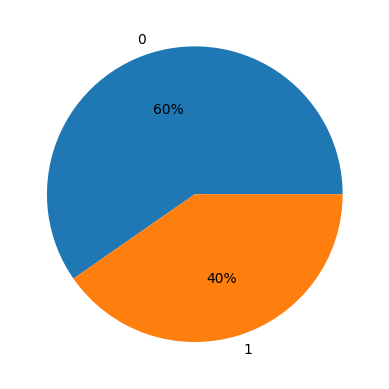

In [14]:
import matplotlib.pyplot as plt
unique, counts = np.unique(target, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%')

In [15]:
from sklearn.model_selection import train_test_split 

# Train and test sets
def split_data(data, ratio):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=ratio, stratify=target)
    X_train.drop('Potability', axis=1, inplace=True)
    X_test.drop('Potability', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

KNN Model 1

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5) # we don´t know yet the optimal number of neighbours

X_train, X_test, y_train, y_test = split_data(data, 0.2) 
print(X_train.shape)
print(X_test.shape)

(1608, 9)
(403, 9)


In [19]:
knn_classifier.fit(X_train, y_train)

# Predictions (on test set, obviously)
knn_predictions = knn_classifier.predict(X_test)

# Calculate error_rate and print it
error_rate = 1 - accuracy_score(y_test, knn_predictions)
print("% Error (k=5): {0:.1%}".format(error_rate))

% Error (k=5): 35.5%


Optimal K (Manually)

In [20]:
def measure_error(num_iterations, K, ratio):
    perf = np.ones(num_iterations)
    for i in range(num_iterations):
        np.random.seed(i)
        X_train, X_test, y_train, y_test = split_data(data, ratio)
        knn_classifier = KNeighborsClassifier(n_neighbors=K)
        knn_classifier.fit(X_train, y_train)
        knn_predictions = knn_classifier.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, knn_predictions)
        perf[i] = error_rate
    return np.mean(perf)

ratio (train set): 0.5
Neighbours: 5 , error: 0.3767
Neighbours: 6 , error: 0.3686
Neighbours: 7 , error: 0.3695
Neighbours: 8 , error: 0.364
Neighbours: 9 , error: 0.365
Neighbours: 10 , error: 0.3627
Neighbours: 11 , error: 0.3616
Neighbours: 12 , error: 0.3614
Neighbours: 13 , error: 0.3604
Neighbours: 14 , error: 0.3594
Neighbours: 15 , error: 0.3596
ratio (train set): 0.6
Neighbours: 5 , error: 0.3787
Neighbours: 6 , error: 0.3706
Neighbours: 7 , error: 0.3756
Neighbours: 8 , error: 0.3684
Neighbours: 9 , error: 0.3724
Neighbours: 10 , error: 0.3682
Neighbours: 11 , error: 0.3682
Neighbours: 12 , error: 0.3664
Neighbours: 13 , error: 0.3675
Neighbours: 14 , error: 0.3672
Neighbours: 15 , error: 0.3661
ratio (train set): 0.7
Neighbours: 5 , error: 0.3851
Neighbours: 6 , error: 0.38
Neighbours: 7 , error: 0.3829
Neighbours: 8 , error: 0.3746
Neighbours: 9 , error: 0.3809
Neighbours: 10 , error: 0.3717
Neighbours: 11 , error: 0.3752
Neighbours: 12 , error: 0.3731
Neighbours: 13 , err

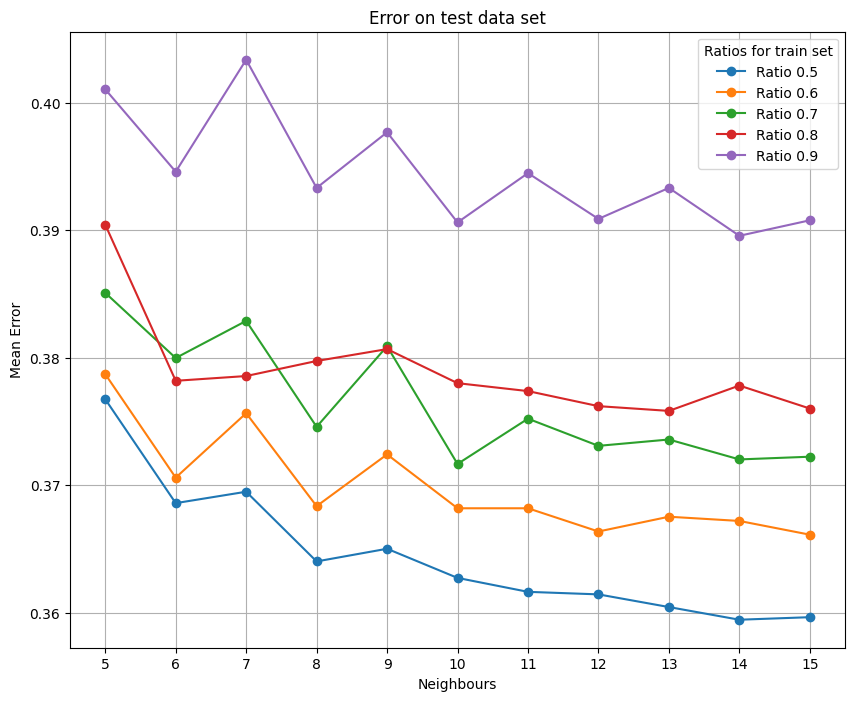

In [22]:
ratios = np.arange(0.5, 1.0, 0.1)
k_values = np.arange(5, 16)

plt.figure(figsize=(10, 8))
plt.xlabel("Neighbours")
plt.ylabel("Mean Error")

for ratio in ratios:
    print("ratio (train set):", np.round(ratio,2))
    mean_error=[]
    for K in k_values:
        error=measure_error(10, K, ratio) #10 iterations
        print("Neighbours:", K, ", error:", np.round(error,4))
        mean_error.append(error)
    
    plt.plot(k_values, mean_error, marker='o', label=f"Ratio {np.round(ratio,2)}")

plt.title("Error on test data set")
plt.legend(title="Ratios for train set")
plt.xticks(k_values)
# plt.ylim(0.2, 0.26)
plt.grid(True)
plt.show()

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=15) 
X_train, X_test, y_train, y_test = split_data(data, 0.5) 
knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

error_rate = 1 - accuracy_score(y_test, knn_predictions)
print("% Error (k=8): {0:.1%}".format(error_rate))

% Error (k=8): 36.1%


KNN Model (GridSearch)

In [24]:
# Grid search
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_neighbors": range(1, 51),
    "weights": ["uniform", "distance"] # try with both options
}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train) 

GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']})

In [25]:
gridsearch.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, confusion_matrix, recall_score, precision_score

# Apply prediction 
train_preds_grid = gridsearch.predict(X_train)

gridpredictions = gridsearch.predict(X_test) #probability of being in both groups
error_rate = 1 - accuracy_score(y_test, gridpredictions)
print("% Error (grid search): {0:.1%}".format(error_rate))

% Error (grid search): 36.2%


Train Accuracy score:  100.0 %
Test Accuracy score:  63.82 %


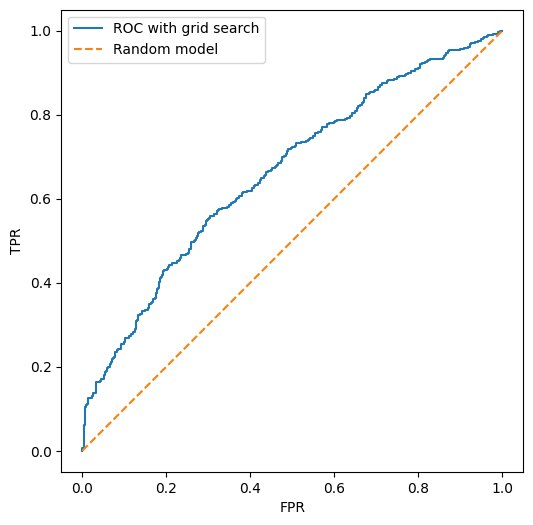

In [27]:
pred_prob = gridsearch.predict_proba(X_test) #probability of being in both groups
prob_1 = [p[1] for p in pred_prob] #probability of being in the survived group

auc = roc_auc_score(y_test, prob_1)

fpr, tpr, thresholds = roc_curve(y_test, prob_1, pos_label=1)

train_acc = round(gridsearch.score(X_train,y_train) * 100,2) #Train Accuracy score
test_acc = round(gridsearch.score(X_test,y_test) * 100,2) #Test Accuracy score
print("Train Accuracy score: ", train_acc, "%")
print("Test Accuracy score: ", test_acc, "%")

# ROC curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label="ROC with grid search")
ax.plot([0, 1], [0, 1],linestyle='--', label="Random model") 
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_box_aspect(1)
ax.legend()
plt.show()

Confusion Matrix


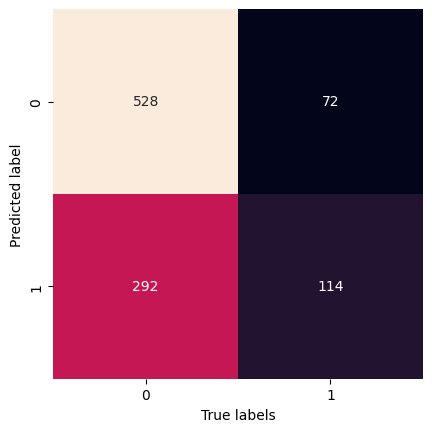

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, gridpredictions)

# Draw heatmap using confusion matrix
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted label');

KNN Model 3 (Bagging Classifier)

In [29]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]

# this is the bagged model we will use
bagged_knn = KNeighborsClassifier( 
    n_neighbors=best_k, weights=best_weights
)

In [30]:
from sklearn.ensemble import BaggingClassifier

knnbagging_model = BaggingClassifier(bagged_knn, n_estimators=100) 
knnbagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=15,
                                                 weights='distance'),
                  n_estimators=100)

Train Accuracy score:  100.0 %
Test Accuracy score:  64.91 %


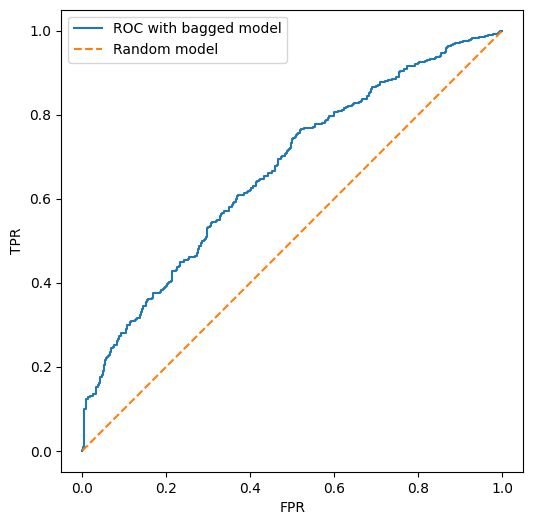

In [31]:
test_preds_grid = knnbagging_model.predict(X_test)

predictions = knnbagging_model.predict(X_test) 
pred_prob = knnbagging_model.predict_proba(X_test) #probability of being in both groups
prob_1 = [p[1] for p in pred_prob] #probability of being in the malign group
auc = roc_auc_score(y_test, prob_1)

fpr, tpr, thresholds = roc_curve(y_test, prob_1, pos_label=1)

train_acc = round(knnbagging_model.score(X_train,y_train) * 100,2) #Train Accuracy score
test_acc = round(knnbagging_model.score(X_test,y_test) * 100,2) #Test Accuracy score
print("Train Accuracy score: ", train_acc, "%")
print("Test Accuracy score: ", test_acc, "%")

# ROC curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(fpr, tpr, label="ROC with bagged model")
ax.plot([0, 1], [0, 1],linestyle='--', label="Random model") 
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_box_aspect(1)
ax.legend()
plt.show()

Confusion Matrix


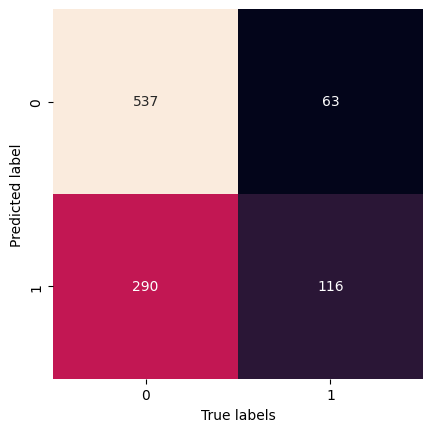

In [32]:
print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, predictions)

# Draw heatmap using confusion matrix
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted label');

In [39]:
threshold = 0.5
customized_predictions = (knnbagging_model.predict_proba(X_test)[:,1] >= threshold).astype(int)

Confusion Matrix


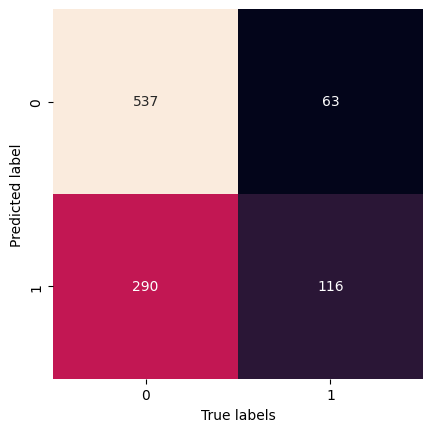

In [40]:
print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, customized_predictions)

# Draw heatmap using confusion matrix
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted label');